In [4]:
import networkx as nx
from operator import add, sub

import numpy as np
import matplotlib.pyplot as plt
from def_space_spring import *
import random
import copy
import python.tools as tl
from statistics import mean
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def set_weights_one(DG):
    for edge in DG.edges():
        DG[edge[0]][edge[1]]['weight'] = 1
    return DG

def multi_to_di(multi_DG):
    DG = nx.DiGraph()
    for u,v,data in multi_DG.edges(data=True):
        w = data['weight'] if 'weight' in data else 1.0
        if DG.has_edge(u,v):
            DG[u][v]['weight'] += w
        else:
            DG.add_edge(u, v, weight=w)
    return DG

def load_dataset(dataset):
    if dataset == "twitter":
        DG = set_weights_one(nx.read_edgelist("data/twitter_combined.txt",create_using=nx.DiGraph(), nodetype = int))

    elif dataset == "email_EU":
        DG = set_weights_one(nx.read_edgelist("data/email-Eu-core.txt",create_using=nx.DiGraph(), nodetype = int))

    elif dataset == "corp_ownership":
        DG = set_weights_one(nx.read_edgelist("data/ownership.txt",create_using=nx.DiGraph(), nodetype = int))

    elif dataset =="wiki_votes":
        DG = set_weights_one(nx.read_edgelist("data/Wiki-Vote.txt",create_using=nx.DiGraph(), nodetype = int))

    elif dataset =="citations_dblp":
        DG = set_weights_one(nx.read_edgelist("data/dblp-cite/out.dblp-cite",create_using=nx.DiGraph(), nodetype = int, data=False))

    elif dataset =="history_faculty":
        multi_DG = nx.read_edgelist("data/faculty_hiring/History_edgelist.txt",create_using=nx.DiGraph(), nodetype = int, data = False)
        DG = multi_to_di(multi_DG)

    elif dataset =="CS_faculty":
        multi_DG = nx.read_edgelist("data/faculty_hiring/ComputerScience_edgelist.txt",create_using=nx.DiGraph(), nodetype = int, data = False)
        DG = multi_to_di(multi_DG)

    elif dataset =="business_faculty":
        multi_DG = nx.read_edgelist("data/faculty_hiring/Business_edgelist.txt",create_using=nx.DiGraph(), nodetype = int, data = False)
        DG = multi_to_di(multi_DG)

    elif dataset =="pol_blogs":
        multi_DG = nx.read_gml("data/polblogs.gml")
        DG = multi_to_di(multi_DG).reverse()

    elif dataset =="celegans_neural":
        multi_DG = nx.read_gml("data/celegansneural.gml")
        DG = multi_to_di(multi_DG)

    elif dataset == "drosophilia":
        multi_DG = nx.read_graphml("data/drosophila_medulla_1.graphml")
        DG = multi_to_di(multi_DG)

    return DG



In [3]:
results_by_dataset = {}

reverse = False
min_iter = 20
print_rate = 100
cut_off_change = 0.1
max_iter = 1000
print_stuff = False

num_of_runs_on_dataset = 20

In [4]:
for dataset in ["corp_ownership", "wiki_votes", "citations_dblp", "history_faculty", "CS_faculty",
                "business_faculty", "pol_blogs", "celegans_neural", "drosophilia", "twitter"]:

    DG = load_dataset(dataset)

    mapping = dict(zip(DG, range(0, DG.number_of_nodes())))
    relabelled_DG = nx.relabel_nodes(DG, mapping)


    basic_pagerank_results = []
    springrank_results = []
    postrank_results = []

    print("Running for dataset ", dataset)

    for i in range(num_of_runs_on_dataset):
        print("     iteration ", i)
        reduced_graph, removed_edges = reduce_graph(relabelled_DG, perc_edge_del=0.2)

        basic_pagerank = generalised_page_rank(reduced_graph, self_loop_weight = 0, alpha = 1,
                                   page_size = 0, end_normalise = False, arrow_dir_powerful = False,
                                   backflow = False, backflow_const = 0,
                                   min_iter = min_iter, print_rate = print_rate, max_iter = max_iter,
                                   cut_off_change = cut_off_change, print_stuff=False)

        postrank = generalised_page_rank(reduced_graph, self_loop_weight = 1, alpha = 1,
                                   page_size = 1, end_normalise = True, arrow_dir_powerful = False,
                                   backflow = True, backflow_const = 0.2,
                                   min_iter = min_iter, print_rate = print_rate, max_iter = max_iter,
                                   cut_off_change = cut_off_change, print_stuff=False)

        springrank = get_spring_ranks(reduced_graph, with_rounding = False)


        basic_pagerank_results.append(perc_correct(removed_edges, basic_pagerank))
        springrank_results.append(perc_correct(removed_edges, springrank))
        postrank_results.append(perc_correct(removed_edges, postrank))

    results_by_dataset[dataset] = {}
    results_by_dataset[dataset]["basic_pagerank"] = basic_pagerank_results
    results_by_dataset[dataset]["postrank"] = postrank_results
    results_by_dataset[dataset]["springrank"] = springrank_results

    print("results:")
    print("basic_pagerank:", mean(basic_pagerank_results))
    print("springrank:", mean(springrank_results))
    print("postrank:", mean(postrank_results))
    print("")



Running for dataset  email_EU
     iteration  0
     iteration  1
     iteration  2
     iteration  3
     iteration  4
     iteration  5
     iteration  6
     iteration  7
     iteration  8
     iteration  9
     iteration  10
     iteration  11
     iteration  12
     iteration  13
     iteration  14
     iteration  15
     iteration  16
     iteration  17
     iteration  18
     iteration  19
results:
basic_pagerank: 0.55957705
springrank: 0.53246275
postrank: 0.53644275

Running for dataset  email_EU_reversed
     iteration  0
     iteration  1
     iteration  2
     iteration  3
     iteration  4
     iteration  5
     iteration  6
     iteration  7
     iteration  8
     iteration  9
     iteration  10
     iteration  11
     iteration  12
     iteration  13
     iteration  14
     iteration  15
     iteration  16
     iteration  17
     iteration  18
     iteration  19
results:
basic_pagerank: 0.4641791
springrank: 0.54900495
postrank: 0.55199005

Running for dataset  corp_owne

KeyboardInterrupt: 

In [5]:
results_by_dataset

{'email_EU': {'basic_pagerank': [0.492537,
   0.587065,
   0.477612,
   0.579602,
   0.599502,
   0.544776,
   0.559701,
   0.529851,
   0.587065,
   0.587065,
   0.60199,
   0.594527,
   0.584577,
   0.552239,
   0.554726,
   0.577114,
   0.537313,
   0.492537,
   0.529851,
   0.621891],
  'postrank': [0.557214,
   0.532338,
   0.512438,
   0.574627,
   0.544776,
   0.50995,
   0.539801,
   0.5199,
   0.507463,
   0.606965,
   0.557214,
   0.539801,
   0.549751,
   0.517413,
   0.549751,
   0.557214,
   0.467662,
   0.512438,
   0.50995,
   0.562189],
  'springrank': [0.547264,
   0.532338,
   0.502488,
   0.564677,
   0.514925,
   0.524876,
   0.539801,
   0.5199,
   0.527363,
   0.60199,
   0.552239,
   0.539801,
   0.549751,
   0.507463,
   0.534826,
   0.557214,
   0.462687,
   0.502488,
   0.514925,
   0.552239]},
 'email_EU_reversed': {'basic_pagerank': [0.485075,
   0.450249,
   0.504975,
   0.455224,
   0.5,
   0.487562,
   0.49005,
   0.442786,
   0.445274,
   0.41791,
   0.5

In [6]:
#with open('data.json', 'w') as fp:
#    json.dump(results_by_dataset, fp, sort_keys=True, indent=4)

In [8]:
with open('data.json', 'r') as fp:
    results_by_dataset = json.load(fp)

In [9]:
results_by_dataset.keys()

dict_keys(['CS_faculty', 'CS_faculty_reversed', 'business_faculty', 'business_faculty_reversed', 'celegans_neural', 'celegans_neural_reversed', 'citations_dblp', 'citations_dblp_reversed', 'corp_ownership', 'corp_ownership_reversed', 'drosophilia', 'drosophilia_reversed', 'email_EU', 'email_EU_reversed', 'history_faculty', 'history_faculty_reversed', 'pol_blogs', 'pol_blogs_reversed', 'wiki_votes', 'wiki_votes_reversed'])

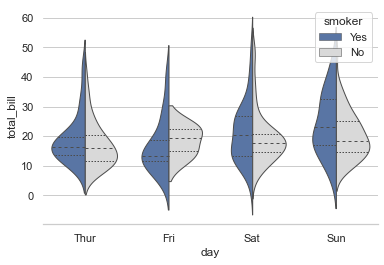

In [2]:
sns.set_theme(style="whitegrid")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
               split=True, inner="quart", linewidth=1,
               palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

In [3]:
tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [19]:
df = pd.DataFrame(columns=["performance", "method", "dataset"])


In [20]:
df

,performance,method,dataset


In [21]:
list(results_by_dataset.keys())[0]
results_by_dataset['CS_faculty']['postrank']

[0.841463,
 0.841463,
 0.756098,
 0.780488,
 0.768293,
 0.865854,
 0.853659,
 0.743902,
 0.902439,
 0.841463,
 0.768293,
 0.780488,
 0.939024,
 0.792683,
 0.890244,
 0.780488,
 0.780488,
 0.890244,
 0.792683,
 0.902439]

In [22]:
for dataset in ["corp_ownership", "wiki_votes", "citations_dblp", "history_faculty", "CS_faculty",
                "business_faculty", "pol_blogs_reversed", "celegans_neural", "drosophilia"]: #results_by_dataset.keys():
    for method in results_by_dataset[dataset].keys():
        for result in results_by_dataset[dataset][method]:
            new_row = {"performance": result, "method": method, "dataset":dataset}
            df = df.append(new_row, ignore_index=True)

In [23]:
df

,performance,method,dataset
0,0.522054,basic_pagerank,corp_ownership
1,0.534459,basic_pagerank,corp_ownership
2,0.531358,basic_pagerank,corp_ownership
3,0.518952,basic_pagerank,corp_ownership
4,0.517919,basic_pagerank,corp_ownership
...,...,...,...
535,0.699438,springrank,drosophilia
536,0.713483,springrank,drosophilia
537,0.693820,springrank,drosophilia
538,0.692416,springrank,drosophilia


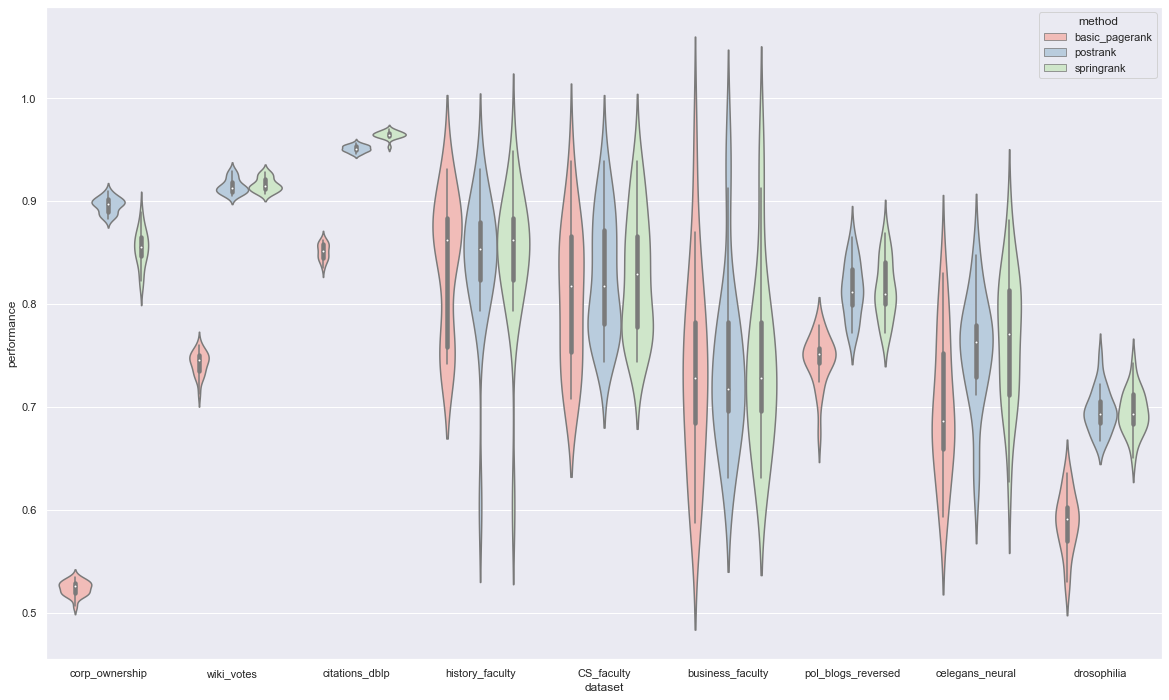

In [26]:
sns.set(rc={'figure.figsize':(20,12)})
sns.violinplot(x="dataset", y="performance", hue="method", data=df, palette="Pastel1")
plt.show()